In [1]:
from model_randomforest import *
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [35]:
data_obesitas = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')
data_obesitas.head(7)


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II
5,Male,29.0,1.62,53.0,no,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Automobile,Normal_Weight
6,Female,23.0,1.50,55.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,0.0,Sometimes,Motorbike,Normal_Weight


In [24]:
data_obesitas.shape

(2111, 17)

In [25]:
data_obesitas.duplicated().sum()

24

In [26]:
data_obesitas.drop_duplicates(inplace=True)

In [27]:
data_obesitas.shape

(2087, 17)

In [28]:
label = ['Gender','family_history_with_overweight','FAVC','CAEC','SMOKE','SCC','CALC','MTRANS','NObeyesdad']
label_encoders = {}
for col in label:
    le = LabelEncoder()
    data_obesitas[col] = le.fit_transform(data_obesitas[col])
    label_encoders[col] = le

In [29]:
import joblib
joblib.dump(label_encoders, 'models/label_encoders.joblib')


['models/label_encoders.joblib']

In [30]:
X = data_obesitas.drop(columns=['NObeyesdad'])
y = data_obesitas.pop('NObeyesdad')

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


0


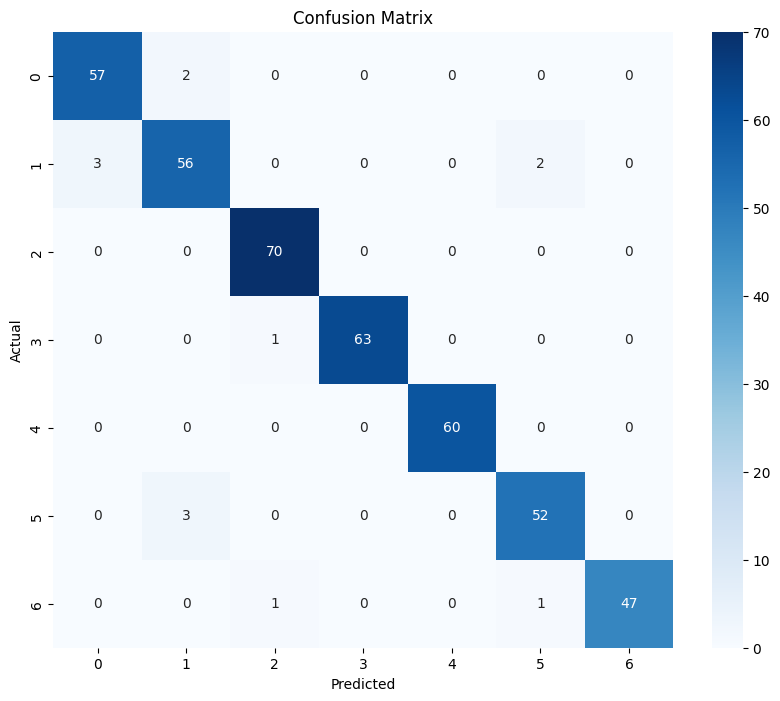

Akurasi: 0.9688995215311005
Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96        59
           1       0.92      0.92      0.92        61
           2       0.97      1.00      0.99        70
           3       1.00      0.98      0.99        64
           4       1.00      1.00      1.00        60
           5       0.95      0.95      0.95        55
           6       1.00      0.96      0.98        49

    accuracy                           0.97       418
   macro avg       0.97      0.97      0.97       418
weighted avg       0.97      0.97      0.97       418



In [33]:
def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

clf = RandomForest_scratch(n_trees=20,max_depth=20,min_samples_split=2)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

acc =  accuracy(y_test, y_pred)
print(int(acc))
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print("Akurasi:", accuracy)
print("Laporan Klasifikasi:\n",report )

In [34]:
import joblib
joblib.dump(clf, 'models/model_random_forest.joblib')

['models/model_random_forest.joblib']